In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

device = "Scientific"
window_micros = 10 * 1e6  # 10 seconds

# 2AM today
start = datetime.now().replace(hour=2, minute=0, second=0, microsecond=0)
start_ts = int(start.timestamp() * 1e6)

end_ts = start_ts + window_micros


url = f"http://fs-pi.local:3000/export/0/latest/{device}/records?&startTs={start_ts}&endTs={end_ts}"
scientific = pd.read_csv(url)

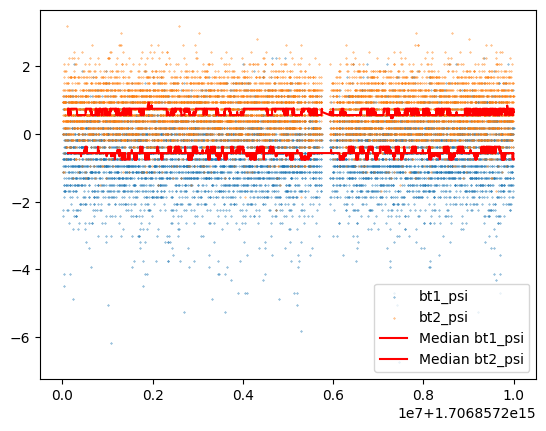

In [3]:
median_window = 100

scientific["bt1_psi"] = scientific["bt1"] / 1000
scientific["bt2_psi"] = scientific["bt2"] / 1000

median1 = scientific["bt1_psi"].rolling(median_window).median()
median2 = scientific["bt2_psi"].rolling(median_window).median()

plt.scatter(scientific["ts"], scientific["bt1_psi"], label="bt1_psi", s=0.1)
plt.scatter(scientific["ts"], scientific["bt2_psi"], label="bt2_psi", s=0.1)

plt.plot(scientific["ts"], median1, label="Median bt1_psi", color="red")
plt.plot(scientific["ts"], median2, label="Median bt2_psi", color="red")

plt.legend()
plt.show()